# (1) 서울시 구역별 전기차 현황

In [14]:
#한글 폰트 설정
from matplotlib import font_manager as fm, rc

font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [15]:
import pandas as pd

#서울시 행정동별 친환경자동차 현황 => 전기차만 뽑고, 구역 묶어 주려고 함
DIR_PATH='../Data_신나령/'
FILE_NAME1=DIR_PATH+'서울시 행정동별 친환경자동차 현황_2022년2월28일.csv'
carDF1=pd.read_csv(FILE_NAME1,encoding='cp949')#인코딩
carDF1

,기준년월,사용본거지시읍면동_행정동기준,차명,연료,최초등록일,현소유자의출생년도
0,2022-02,서울특별시 구로구 신도림동,K7 하이브리드,하이브리드(휘발유+전기),2014-03-19,1967.0
1,2022-02,서울특별시 구로구 신도림동,토요타 Prius V,하이브리드(휘발유+전기),2017-04-28,1980.0
2,2022-02,서울특별시 구로구 신도림동,니로 하이브리드,하이브리드(휘발유+전기),2018-04-27,1990.0
3,2022-02,서울특별시 구로구 신도림동,투싼 하이브리드(TUCSON HYBRI,하이브리드(휘발유+전기),2021-07-14,1981.0
4,2022-02,서울특별시 구로구 신도림동,토요타 PRIUS,하이브리드(휘발유+전기),2012-03-16,1983.0
...,...,...,...,...,...,...
189936,2022-02,서울특별시 중랑구 중화2동,토요타 Camry Hybrid,하이브리드(휘발유+전기),2016-06-29,1970.0
189937,2022-02,서울특별시 중랑구 중화2동,니로 하이브리드,하이브리드(휘발유+전기),2017-10-25,1979.0
189938,2022-02,서울특별시 중랑구 중화2동,봉고Ⅲ 1톤 EV,전기,2021-10-26,1973.0
189939,2022-02,서울특별시 중랑구 중화2동,포터Ⅱ 일렉트릭 (PORTERⅡ EL,전기,2020-11-04,1958.0


In [16]:
# 주소랑 연료 빼고 필요 없는 칼럼 잘라 줌
recarDF1=carDF1.drop(['기준년월','차명','최초등록일','현소유자의출생년도'],axis=1)
recarDF1.isnull().sum()# 사용본거지시읍면동_행정동기준 데이터 안에 NaN 값이 11개가 있음

사용본거지시읍면동_행정동기준    11
연료                  0
dtype: int64

In [17]:
# NaN 값 있는 행 아예 삭제해 줌
recarDF1.dropna(inplace=True)
recarDF1.isnull().sum()

사용본거지시읍면동_행정동기준    0
연료                 0
dtype: int64

In [18]:
# 주소 전체를 구역별로 나눠 줌
discarDF1=recarDF1['사용본거지시읍면동_행정동기준'].str.split(' ',expand=True)#문자열을 3개로 나눠서 별도의 프레임으로 확장
discarDF1=discarDF1.drop([0,2],axis=1)#'구'만 저장
discarDF1

,1
0,구로구
1,구로구
2,구로구
3,구로구
4,구로구
...,...
189936,중랑구
189937,중랑구
189938,중랑구
189939,중랑구


In [19]:
# recarDF1 데이터에서 주소 칼럼 없애고 연료 칼럼만 따로 저장
fuelDF1=recarDF1.drop(['사용본거지시읍면동_행정동기준'],axis=1)
fuelDF1

,연료
0,하이브리드(휘발유+전기)
1,하이브리드(휘발유+전기)
2,하이브리드(휘발유+전기)
3,하이브리드(휘발유+전기)
4,하이브리드(휘발유+전기)
...,...
189936,하이브리드(휘발유+전기)
189937,하이브리드(휘발유+전기)
189938,전기
189939,전기


In [20]:
# 앞에서 분리했던 칼럼들 합쳐 주기
totalDF1=pd.concat([discarDF1,fuelDF1],axis=1)
totalDF1

,1,연료
0,구로구,하이브리드(휘발유+전기)
1,구로구,하이브리드(휘발유+전기)
2,구로구,하이브리드(휘발유+전기)
3,구로구,하이브리드(휘발유+전기)
4,구로구,하이브리드(휘발유+전기)
...,...,...
189936,중랑구,하이브리드(휘발유+전기)
189937,중랑구,하이브리드(휘발유+전기)
189938,중랑구,전기
189939,중랑구,전기


In [21]:
# 연료가 전기인 것만 뽑음
fuel=totalDF1['연료']
electric=(fuel=='전기')
elecarDF=totalDF1[electric]
elecarDF# 전기차

,1,연료
8,구로구,전기
15,구로구,전기
17,구로구,전기
22,구로구,전기
26,구로구,전기
...,...,...
189922,중랑구,전기
189934,중랑구,전기
189938,중랑구,전기
189939,중랑구,전기


In [22]:
# 구역별 값 개수 확인
elecarDF[1].value_counts()

강남구     12176
구로구      3799
서초구      3497
영등포구     2388
송파구      1991
강서구      1777
성동구      1461
강동구      1294
마포구      1087
양천구       998
용산구       975
중구        968
성북구       926
은평구       901
노원구       896
중랑구       778
관악구       777
동작구       726
서대문구      670
동대문구      659
도봉구       639
광진구       623
종로구       612
금천구       561
강북구       514
Name: 1, dtype: int64

In [23]:
# '구역별 전기차 수' 새로운 데이터프레임으로 저장
newDF1=pd.DataFrame(elecarDF[1].value_counts())
newDF1.reset_index(inplace=True)
newDF1.columns=['구역별','전기차 수']
newDF1.sort_values('구역별',inplace=True)#구역별 가나다 순으로 정렬
newDF1.set_index('구역별',inplace=True)
newDF1

,전기차 수
구역별,
강남구,12176
강동구,1294
강북구,514
강서구,1777
관악구,777
광진구,623
구로구,3799
금천구,561
노원구,896


In [24]:
# 전기차 수의 평균, 표준편차, 최소값, 최대값 확인
newDF1.describe().iloc[[1,2,3,7]]

,전기차 수
mean,1667.720000
std,2353.401289
min,514.000000
max,12176.000000


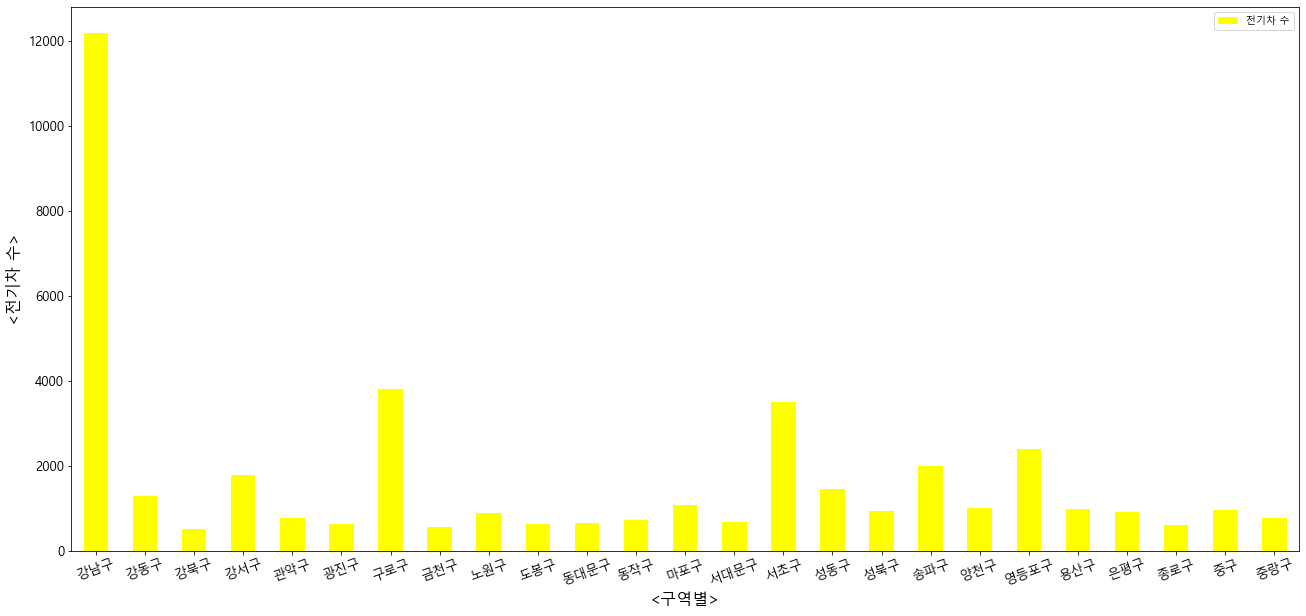

In [25]:
# '구역별 전기차 수' 그래프로 나타내기
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(22,10)#그래프 사이즈 설정
newDF1.plot(kind='bar',color='#FFFF00')#막대 그래프
plt.xlabel('<구역별>',size=16)#X축 이름
plt.ylabel('<전기차 수>',size=16)#Y축 이름
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전기차 수', ylabel='Density'>

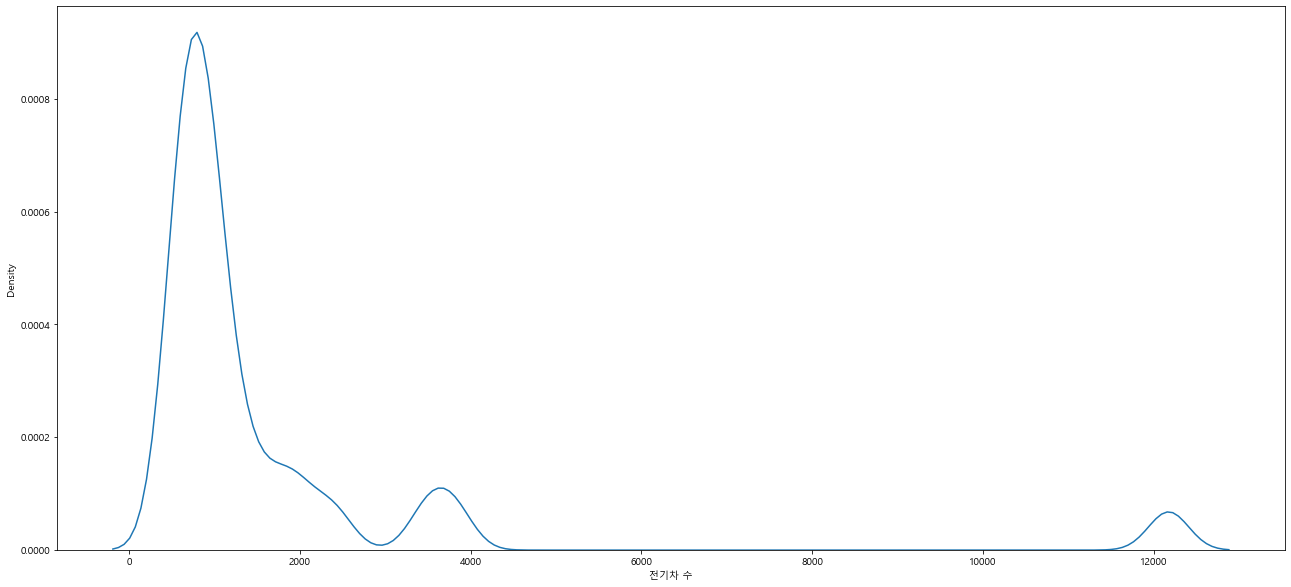

In [26]:
import seaborn as sns
sns.kdeplot(newDF1['전기차 수'],bw=0.1)

# (2) 서울시 구역별 충전소 현황

In [27]:
#서울시 충전소 현황 => 전기차만 뽑고, 구역 묶어 주기
FILE_NAME2=DIR_PATH+'서울시 전기차 급속충전기 정보 현황.csv'
carDF2=pd.read_csv(FILE_NAME2,encoding='cp949')#인코딩
carDF2

,광역지자체,시군구,50KW,100KW싱글,100KW듀얼,200KW듀얼,300KW이상,사용량(kWh),등록일시
0,서울특별시,마포구,0,0,6,0,0,3717.560,2020-11-01 23:07:00.0
1,서울특별시,강남구,0,8,0,0,0,18207.240,2020-11-01 23:07:00.0
2,서울특별시,중랑구,1,0,0,0,0,42146.620,2020-11-01 23:07:00.0
3,서울특별시,성북구,2,0,0,0,0,40423.830,2020-11-01 23:07:00.0
4,서울특별시,성동구,2,0,0,0,0,39226.960,2020-11-01 23:07:00.0
...,...,...,...,...,...,...,...,...,...
340,서울특별시,영등포구,0,0,1,0,0,5970.520,2020-11-01 23:07:00.0
341,서울특별시,강서구,2,0,0,0,0,28448.966,2020-11-01 23:07:00.0
342,서울특별시,강남구,0,0,2,0,0,106523.520,2020-11-01 23:07:00.0
343,서울특별시,강동구,2,0,0,0,0,8705.661,2020-11-01 23:07:00.0


In [28]:
# 필요 없는 칼럼 잘라 줌
recarDF2=carDF2.drop(['광역지자체','사용량(kWh)','등록일시'],axis=1)
recarDF2.isnull().sum()

시군구        0
50KW       0
100KW싱글    0
100KW듀얼    0
200KW듀얼    0
300KW이상    0
dtype: int64

In [29]:
# recarDF2 데이터에서 '시군구' 칼럼 빼고 지워 줌
discarDF2=recarDF2.drop(['50KW','100KW싱글','100KW듀얼','200KW듀얼','300KW이상'],axis=1)
discarDF2

,시군구
0,마포구
1,강남구
2,중랑구
3,성북구
4,성동구
...,...
340,영등포구
341,강서구
342,강남구
343,강동구


In [30]:
# recarDF2에서 충전소 수를 계산하기 위해 값들 더해서 새로운 DF 생성
countDF=recarDF2['50KW']+recarDF2['100KW싱글']+recarDF2['100KW듀얼']+recarDF2['200KW듀얼']+recarDF2['300KW이상']
countDF=pd.DataFrame(countDF)
countDF

,0
0,6
1,8
2,1
3,2
4,2
...,...
340,1
341,2
342,2
343,2


In [31]:
# 앞에 데이터 2개 합쳐 주기
totalDF2=pd.concat([discarDF2,countDF],axis=1)
totalDF2

,시군구,0
0,마포구,6
1,강남구,8
2,중랑구,1
3,성북구,2
4,성동구,2
...,...,...
340,영등포구,1
341,강서구,2
342,강남구,2
343,강동구,2


In [32]:
# 시군구별 개수
totalDF2.시군구.value_counts()

강남구     32
강서구     23
송파구     21
서초구     21
영등포구    20
마포구     19
양천구     17
성동구     16
중구      15
노원구     15
은평구     14
용산구     13
강동구     12
구로구     12
도봉구     12
광진구     11
관악구     11
금천구     10
종로구      9
성북구      8
서대문구     7
강북구      7
중랑구      7
동작구      7
동대문구     6
Name: 시군구, dtype: int64

In [33]:
# 새로운 데이터프레임으로 저장
newDF2=pd.DataFrame(totalDF2.시군구.value_counts())
newDF2.reset_index(inplace=True)
newDF2.columns=['구역별','충전소 수']
newDF2.sort_values('구역별',inplace=True)#구역별 가나다 순으로 정렬
newDF2.set_index('구역별',inplace=True)
newDF2

,충전소 수
구역별,
강남구,32
강동구,12
강북구,7
강서구,23
관악구,11
광진구,11
구로구,12
금천구,10
노원구,15


In [34]:
# 충전소 평균값, 표준편차, 최소값, 최대값
newDF2.describe().iloc[[1,2,3,7]]

,충전소 수
mean,13.800000
std,6.278269
min,6.000000
max,32.000000


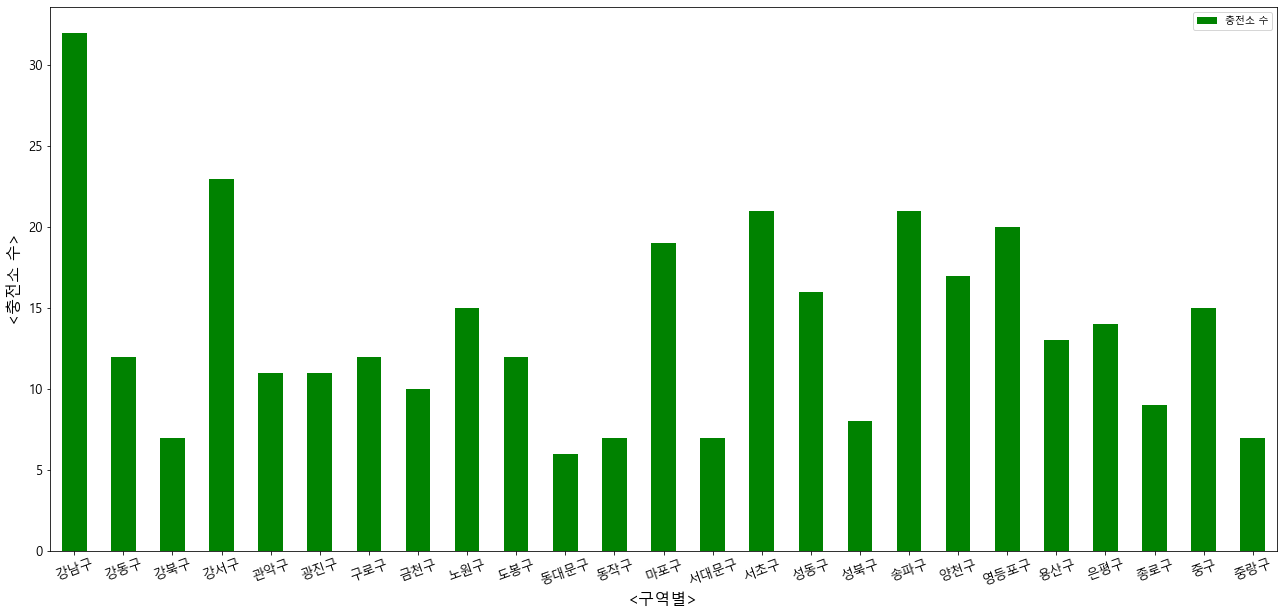

In [35]:
# '구역별 충전소 수' 그래프로 나타내기
newDF2.plot(kind='bar',color='#008200')#막대 그래프
plt.xlabel('<구역별>',size=16)#X축 이름
plt.ylabel('<충전소 수>',size=16)#Y축 이름
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

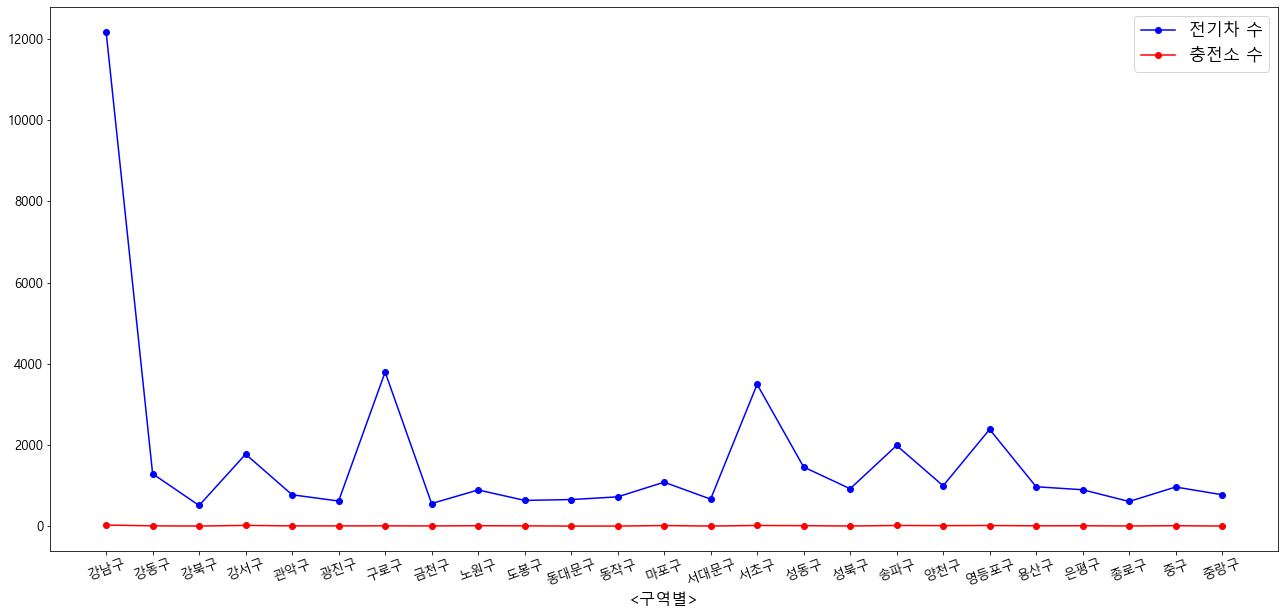

In [36]:
# 전기차 수와 충전소 수 비교 그래프
plt.plot(newDF1,label='전기차 수',color='blue',marker='o')
plt.plot(newDF2,label='충전소 수',color='red',marker='o')
plt.xlabel('<구역별>',size=16)
plt.legend(['전기차 수','충전소 수'],fontsize=17)
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

# (3) 1-2를 바탕으로 결과 도출

In [37]:
# 1번, 2번 데이터 합치기
reDF=pd.merge(newDF1,newDF2,on='구역별')
reDF.reset_index('구역별',inplace=True)
reDF

,구역별,전기차 수,충전소 수
0,강남구,12176,32
1,강동구,1294,12
2,강북구,514,7
3,강서구,1777,23
4,관악구,777,11
5,광진구,623,11
6,구로구,3799,12
7,금천구,561,10
8,노원구,896,15
9,도봉구,639,12


In [38]:
# 구역별 충전소 하나가 감당하는 전기차 수 DF 생성
total=[]
for i in range(25):
    total.append(int(reDF.iloc[i,1]/reDF.iloc[i,2]))#소수점 버림
assignDF=pd.DataFrame(total)
assignDF.columns=['전기차/충전소 수']
resultDF=pd.concat([reDF,assignDF],axis=1)
resultDF.set_index('구역별',inplace=True)
resultDF

,전기차 수,충전소 수,전기차/충전소 수
구역별,,,
강남구,12176,32,380
강동구,1294,12,107
강북구,514,7,73
강서구,1777,23,77
관악구,777,11,70
광진구,623,11,56
구로구,3799,12,316
금천구,561,10,56
노원구,896,15,59


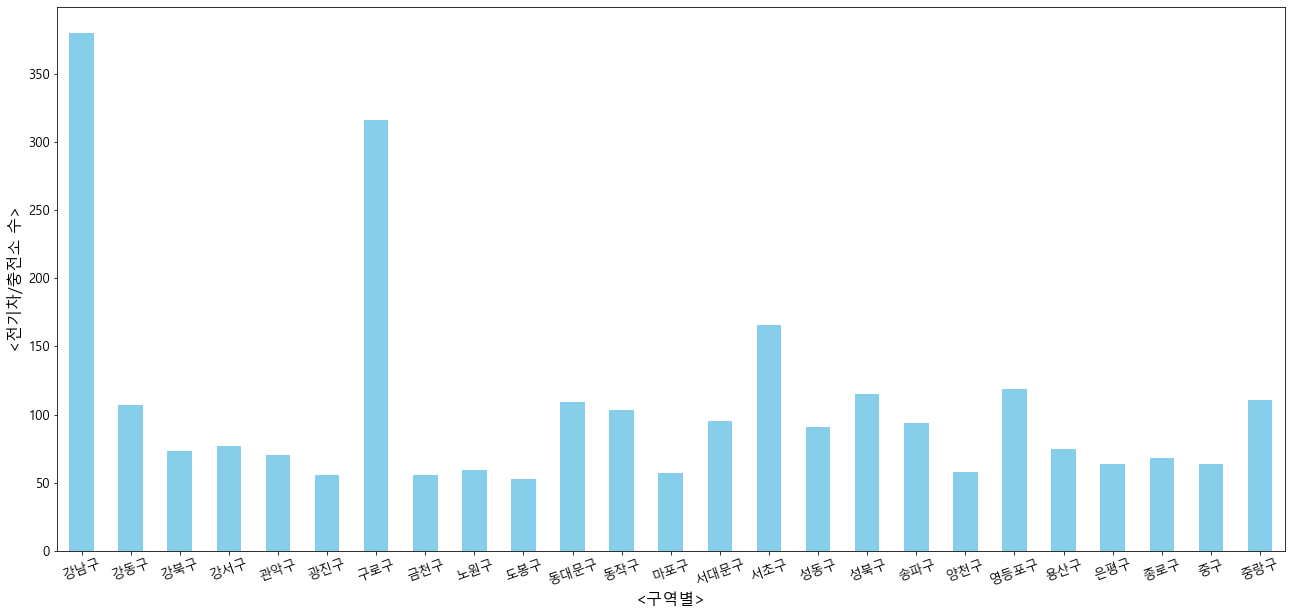

In [39]:
# 구역별 충전소 하나가 감당하는 전기차 수 그래프
resultDF['전기차/충전소 수'].plot(kind='bar',color='skyblue')#막대 그래프
plt.xlabel('<구역별>',size=16)#X축 이름
plt.ylabel('<전기차/충전소 수>',size=16)#Y축 이름
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

In [40]:
# 구역별 전기차 수 상위 5위
compare=resultDF.sort_values('전기차 수',ascending=False)
compare.head()[['전기차 수']]

,전기차 수
구역별,
강남구,12176
구로구,3799
서초구,3497
영등포구,2388
송파구,1991


In [41]:
# 구역별 충전소 수 상위 5위
compare=resultDF.sort_values('충전소 수',ascending=False)
compare.head()[['충전소 수']]

,충전소 수
구역별,
강남구,32
강서구,23
서초구,21
송파구,21
영등포구,20


In [42]:
# 평균값
resultDF.describe().iloc[[1]][['전기차/충전소 수']]

,전기차/충전소 수
mean,105.44


In [43]:
# 감당해야 할 수가 평균 이상 구역들
meanCount=resultDF.describe()['전기차/충전소 수'][1]
count=resultDF['전기차/충전소 수']
resultDF[count>=meanCount][['전기차/충전소 수']]

,전기차/충전소 수
구역별,
강남구,380
강동구,107
구로구,316
동대문구,109
서초구,166
성북구,115
영등포구,119
중랑구,111


In [44]:
# => 보충이 필요할 것 같은 구역 5위
compare=resultDF.sort_values('전기차/충전소 수',ascending=False)
compare.head()[['전기차/충전소 수']]

,전기차/충전소 수
구역별,
강남구,380
구로구,316
서초구,166
영등포구,119
성북구,115


## ↘서울시 인구수랑 비교하고 싶었지만 무슨 관계가 있는지 잘 모르겠어서 보류..

In [45]:
# FILE_NAME3=DIR_PATH+'서울시 자치구별 총인구 (추계인구) 통계.xls'
# prDF=pd.read_excel(FILE_NAME3)

In [46]:
# # 행정구역별이랑 총인구 빼고 필요 없는 칼럼 잘라 줌
# reprDF=prDF.drop(['기간','남자','여자'],axis=1)
# reprDF.isnull().sum()

In [47]:
# # 행정구역당 총인구 수
# populDF=reprDF.set_index('행정구역별')[1:]
# populDF.sort_values('총인구',ascending=False).head()